# Laboratory session 7
***

**Author:** Rinaldi Luca 

### Exercise 1
***
A well enstablished method for detecting disease in blood fails to detect the presence of disease in 15% of patients that actually have the disease.

A new method is tested on a sample of $ n= 75$ patientes. 

#### 1.a)
***
The probability distribution of $y$, the number of times the new method fails to detect the disease follow a binomial distribution (the process of testing a patient is a Bernoulli process).

#### 1.b)
***
The frequentist estimator of failure probability of the new method is:
$$
p_f = \frac{y}{n}
$$

given detection failures $ y=6 $.

In [1]:
n <- 75
y <- 6
p_f   <- y/n
var_f <- p_f*(1-p_f)/n
cat('Expected value of the frequentist estimator:\t',p_f)
cat('\nVariance of the frequentist estimator:\t\t',var_f)

Expected value of the frequentist estimator:	 0.08
Variance of the frequentist estimator:		 0.0009813333

#### 1.c)
***
For the Bayesian computation we assume as prior **Beta**$(\alpha,\beta)$ with mean $\mu=0.15$ and standard deviation $\sigma = 0.14$, so that:

$$
\alpha = \biggl( \frac{\mu (1- \mu)}{\sigma^2} -1 \biggr) \mu \\
   \beta = \biggl( \frac{\mu (1- \mu)}{\sigma^2} -1 \biggr) (1- \mu)
$$

The posterior distribution will be **Beta**$(\alpha + y,\beta +n-y)$

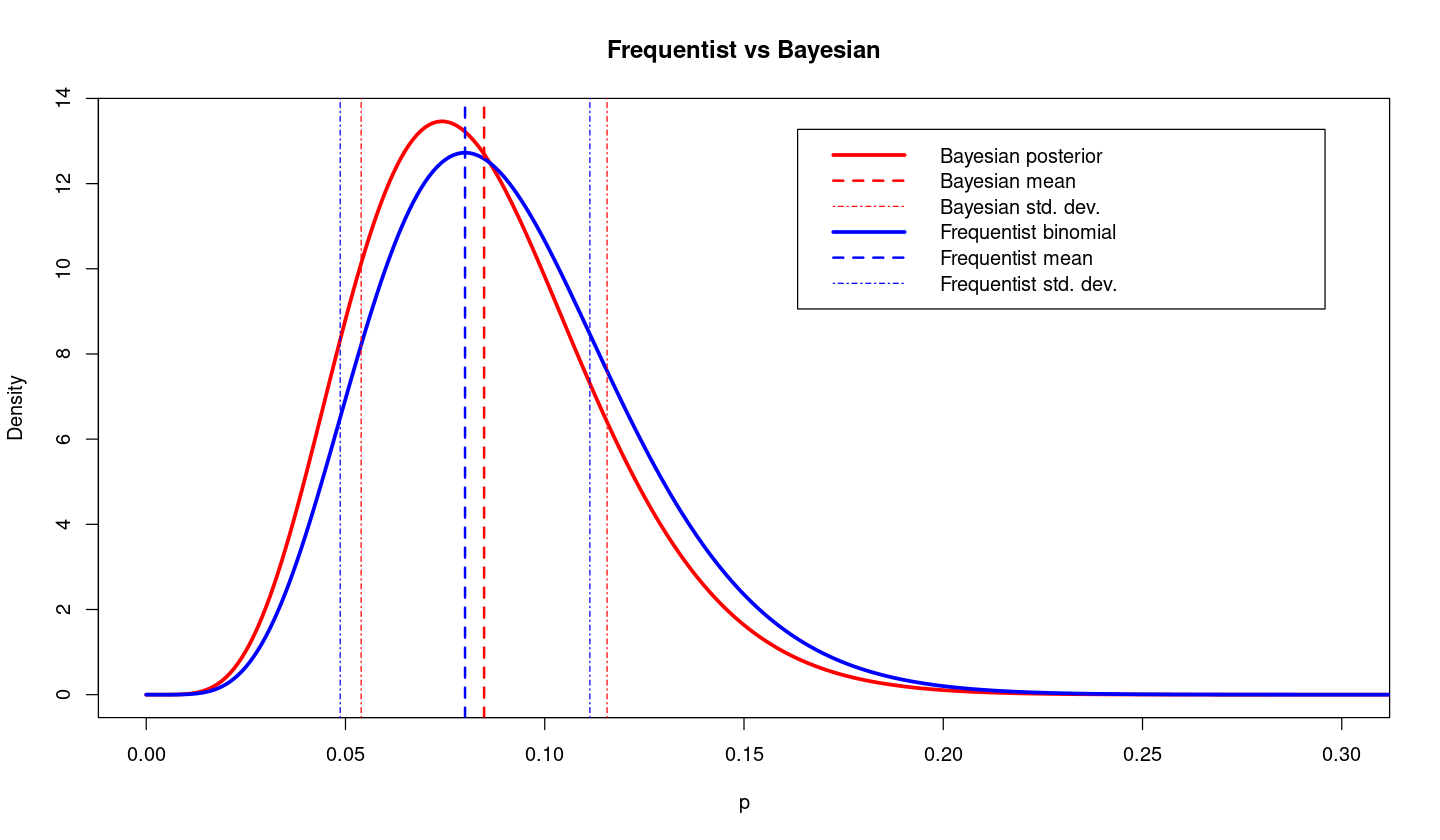

In [2]:
dp  <- 1/1000
p   <- seq(from=0, to=1, by=dp)
j   <- length(p)
mu  <- 0.15
std <- 0.14
a   <- mu*(mu*(1-mu)/(std^2) -1)
b   <- (1-mu)*(mu*(1-mu)/(std^2) -1)
a.1 <- a+y
b.1 <- b+n-y

beta.post <- dbeta(p, a.1, b.1)
beta.post <- beta.post / (dp*sum(beta.post[1:j-1]+beta.post[2:j])/2)
p_b   <- (a.1)/(a.1+b.1)
var_b <- a.1*b.1/((a.1+b.1+1)*(a.1+b.1)^2)

binom_f <- dbinom(x=y, size=n, prob=p)
binom_f <- binom_f/ (dp*sum(binom_f[1:j-1]+binom_f[2:j])/2)

options(repr.plot.width=12, repr.plot.height=7)
plot(p, beta.post, main='Frequentist vs Bayesian', ylab='Density', xlab='p',
     type='l', lty=1, lwd=3, col='red', xlim=c(0,0.3))
lines(p, binom_f, lty=1, lwd=3, col='blue')
abline(v=p_b, lty=2,lwd=2, col='red')
abline(v=p_f, lty=2,lwd=2, col='blue')
abline(v=p_b+sqrt(var_b), lty=4,lwd=1, col='red')
abline(v=p_b-sqrt(var_b), lty=4,lwd=1, col='red')
abline(v=p_f+sqrt(var_f), lty=4,lwd=1, col='blue')
abline(v=p_f-sqrt(var_f), lty=4,lwd=1, col='blue')
legend('topright', legend=c('Bayesian posterior','Bayesian mean','Bayesian std. dev.',
                            'Frequentist binomial','Frequentist mean','Frequentist std. dev.'), 
       lty=c(1,2,4), lwd=c(3,2,1), col=c('red','red','red','blue','blue','blue'), inset=0.05)

#### 1.d)
***
The null hypotesis is $H_0 : p \geq 0.15$

P(p>0.15|y=6)=0.03127933

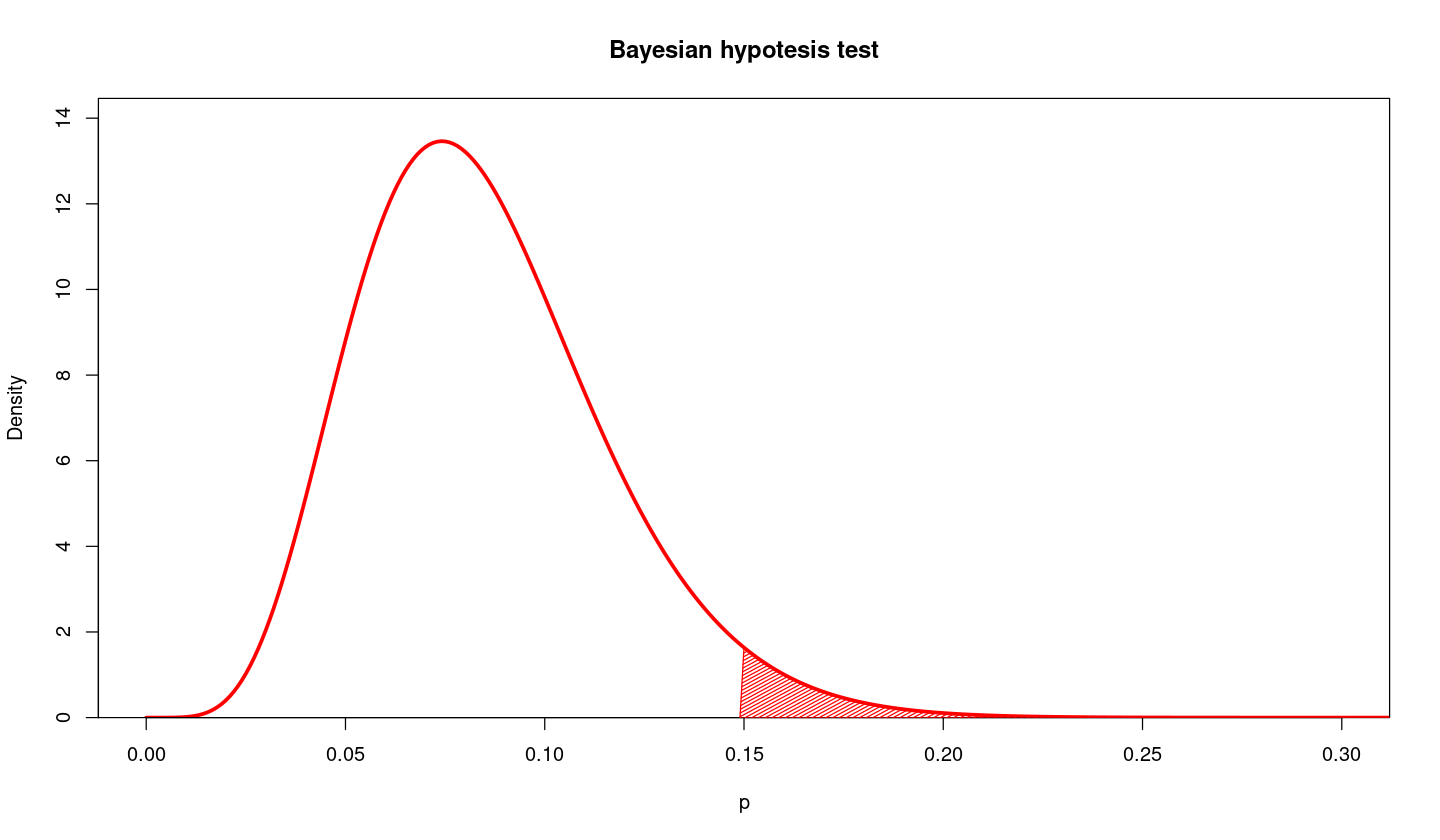

In [3]:
plot(p, beta.post, main='Bayesian hypotesis test', ylab='Density', xlab='p',
     type='l', lty=1, lwd=3, col='red', xlim=c(0,0.3),ylim=c(0,max(beta.post)+1), yaxs='i')
polygon(p[(which(p==0.15)-1):j],c(0,beta.post[which(p==0.15):j]), col='red', density=50)

cat('P(p>0.15|y=6)=',pbeta(0.15,a.1,b.1,lower.tail=FALSE),sep='')


$P(p \geq 0.15 | y=6)$ is less than $5\%$ so we can reject the null hypotesis and we can state that the new method is better than the older one.


#### 1.e)
***

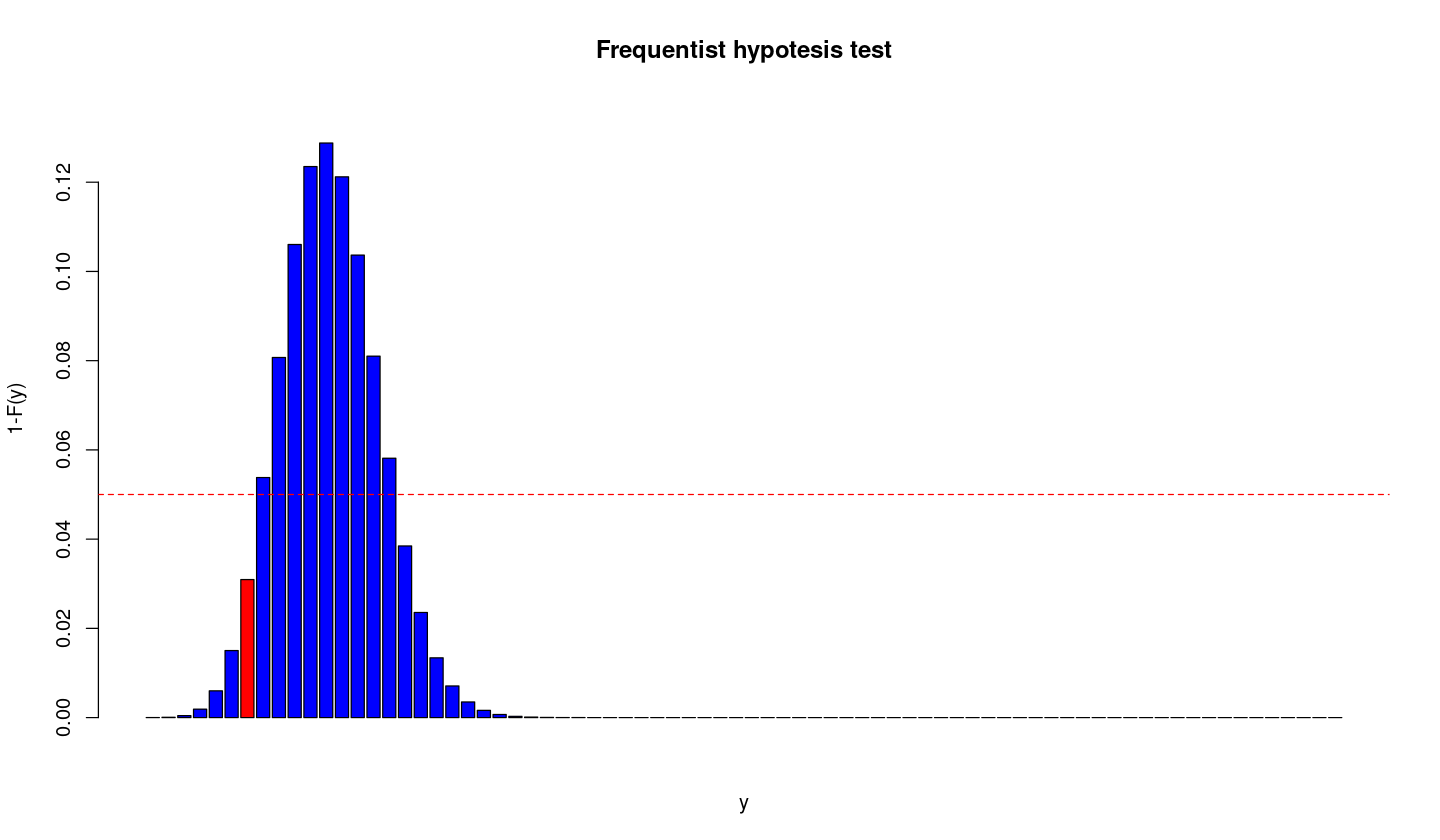

In [4]:
x <- 0:75

dist <- dbinom(x=x, size=n, p=0.15)

barplot(dist, main='Frequentist hypotesis test', ylab='1-F(y)', xlab='y',
        col=ifelse(x==6,'red','blue'),ylim=c(0,max(dist)+0.01), yaxs='i')
abline(h=0.05, lty=2, col='red')

Also in this case the null hypotesis is rejected with a significance of $5\%$

### Exercise 2
***

| <!-- -->    | <!-- -->    |<!-- -->    | <!-- -->    |<!-- -->    | <!-- -->    |<!-- -->    |
|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| **$y$ death soldiers** | 0 | 1 | 2 | 3 | 4 | $\geq$5 |
| **$n_1$ observations** | 109 | 65 | 22 | 3 | 1 | 0 |
| **$n_2$ observations** | 144 | 91 | 32 | 11 | 2 | 0 |

In [5]:
credibility <- function(x, perc){
                cdf <- cumsum(x)
                for (i in 2:length(x)){
                    if ((1-perc)/2 >= cdf[i-1] & (1-perc)/2 < cdf[i]){x1 <- i-1}
                    if ((1+perc)/2 > cdf[i-1] & (1+perc)/2 <= cdf[i]){x2 <- i}
                }
                return(c(x1,x2))
}
y  <- 0:4
n1 <- c(109,65,22,3,1)
n2 <- c(144,91,32,11,2)

#### 2.a) 
***

Assuming a uniform prior
$$
g(\lambda)=1 \hspace{0.6cm} for \hspace{0.6cm} \lambda > 0
$$

the posterior becomes:
$$
P(\lambda | \{ y_j \} ) \propto \lambda^{\sum y_j} e^{-n\lambda}.
$$

It can be represented by $\mathbf{Gamma}(\alpha,\lambda')$ with $\alpha = \sum y_j +1$ and $\lambda'=n$ 

		Mean		Median		Variance	Credib_left	Credib_right
n1		0.615		0.6133341	0.003075	0.505		0.73
n2		0.7035714	0.7023813	0.002512755	0.605		0.805
n1+n2		0.6645833	0.663889	0.001384549	0.59		0.74

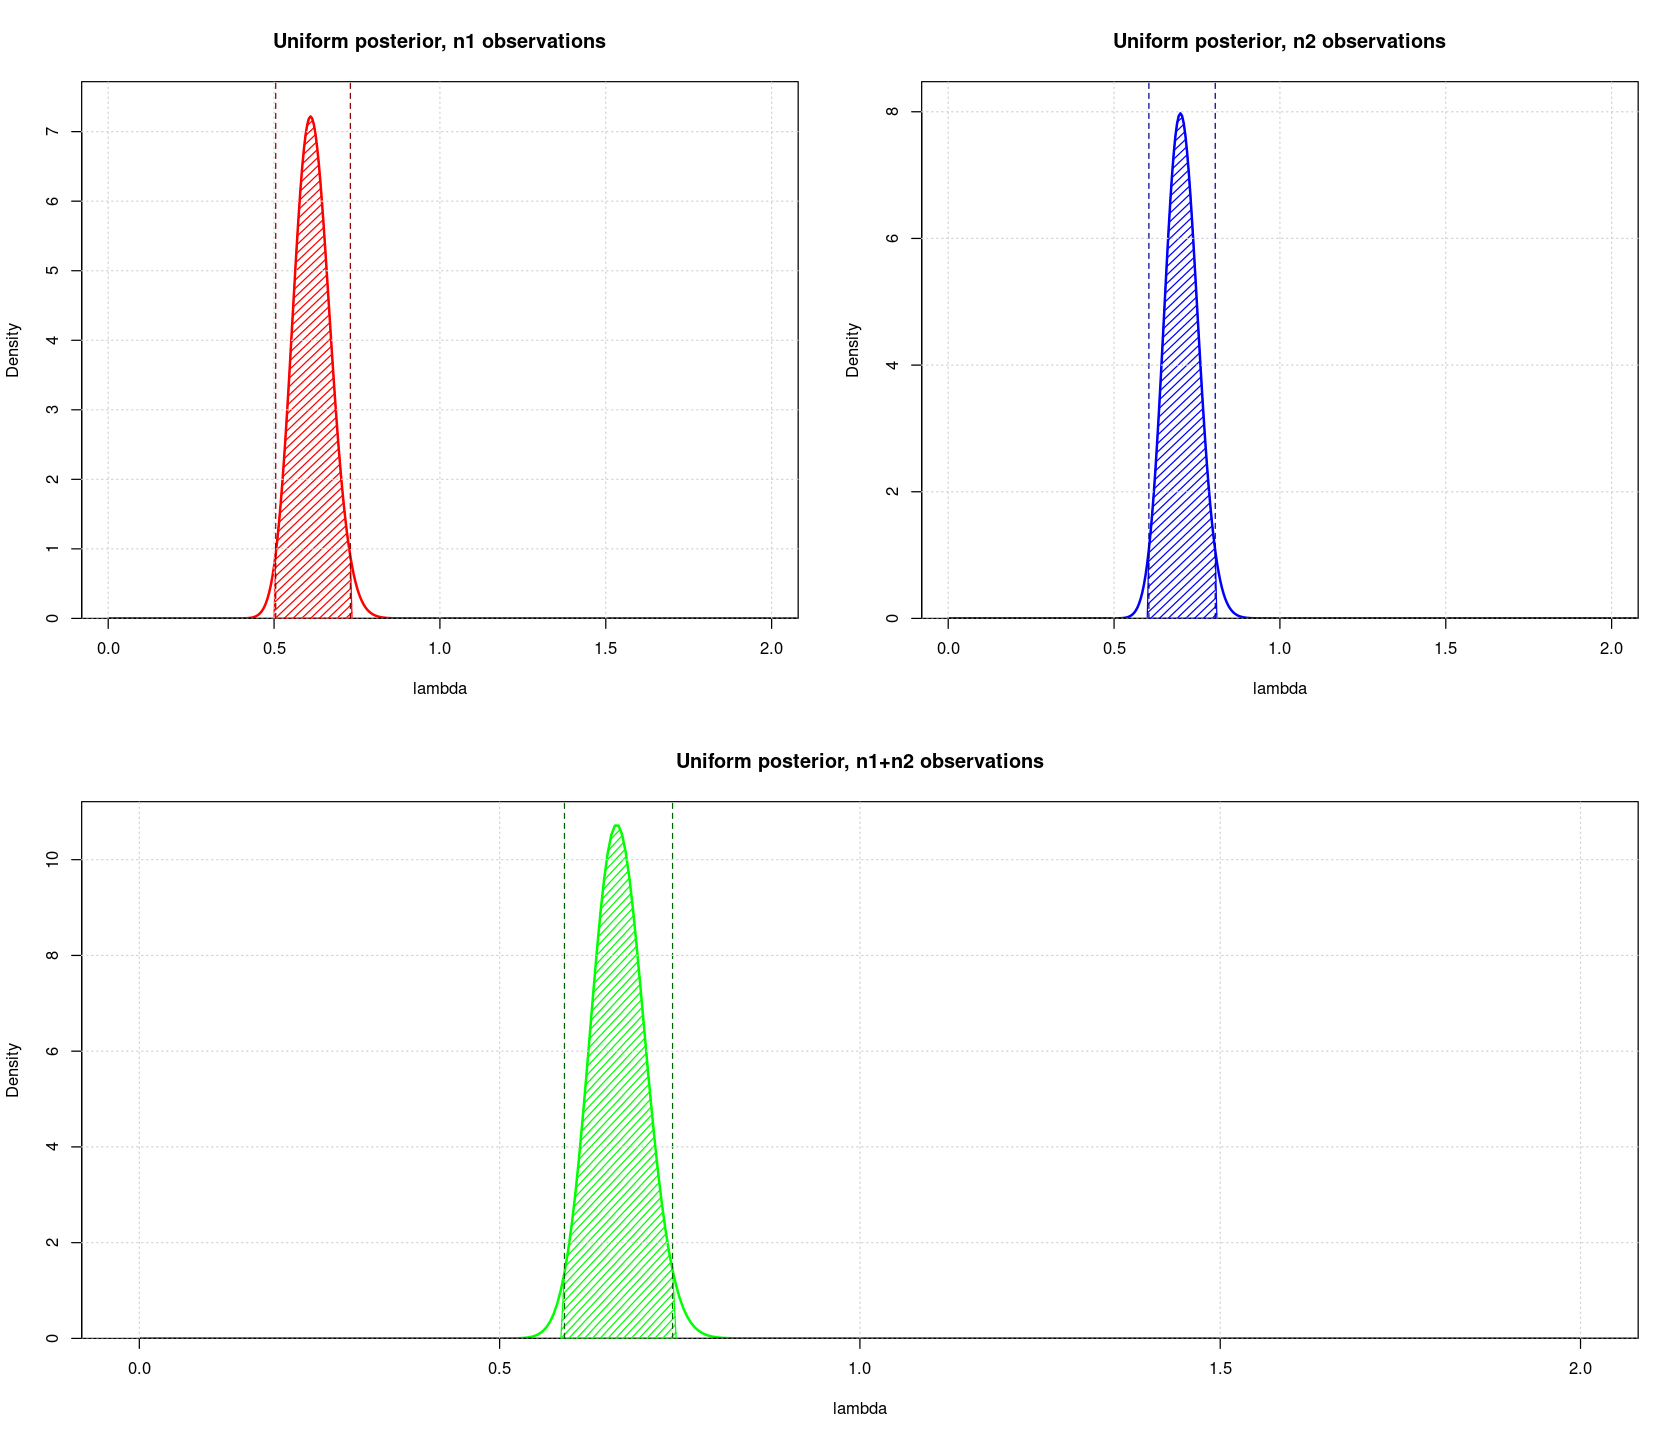

In [6]:
alpha1  <- sum(y*n1)+1
lambda1 <- sum(n1)
alpha2  <- sum(y*n2)+1
lambda2 <- sum(n2)
alpha   <- sum(y*(n1+n2))+1
lambda  <- sum(n1+n2)

dl <- 1/200
l  <- seq(0,max(y),dl)
j  <- length(l)

unif.post1 <- dgamma(l, alpha1, lambda1)
unif.post1 <- unif.post1 / (dl*sum(unif.post1[1:j-1]+unif.post1[2:j])/2) 
unif.post2 <- dgamma(l, alpha2, lambda2)
unif.post2 <- unif.post2 / (dl*sum(unif.post2[1:j-1]+unif.post2[2:j])/2) 
unif.post  <- dgamma(l, alpha, lambda)
unif.post  <- unif.post / (dl*sum(unif.post[1:j-1]+unif.post[2:j])/2) 

unif.i1  <- credibility(unif.post1*dl,0.95)
unif.i2  <- credibility(unif.post2*dl,0.95)
unif.i   <- credibility(unif.post*dl,0.95)

cat('\t\tMean\t\tMedian\t\tVariance\tCredib_left\tCredib_right')
cat('\nn1\t\t',alpha1/lambda1,'\t\t',qgamma(0.5,alpha1,lambda1),'\t',alpha1/(lambda1^2),
    '\t',l[unif.i1[1]],'\t\t',l[unif.i1[2]],sep='')
cat('\nn2\t\t', alpha2/lambda2,'\t',qgamma(0.5,alpha2,lambda2),'\t',alpha2/(lambda2^2),
    '\t',l[unif.i2[1]],'\t\t',l[unif.i2[2]],sep='')
cat('\nn1+n2\t\t', alpha/lambda,'\t',qgamma(0.5,alpha,lambda),'\t',alpha/(lambda^2),
    '\t',l[unif.i[1]],'\t\t',l[unif.i[2]],sep='')

options(repr.plot.width=14, repr.plot.height=12)
m <- rbind(c(1,2), c(3,3))
layout(m)

plot(l,unif.post1,type='l',lwd=2,col='red',main='Uniform posterior, n1 observations',
     xlab='lambda',ylab='Density', yaxs='i', ylim=c(0,max(unif.post1)+0.5), xlim=c(0,2))
polygon(x = l[(unif.i1[1]-1):(unif.i1[2]+1)], y = c(0,unif.post1[unif.i1[1]:unif.i1[2]],0), 
        col='red', density=50 )
abline(v=l[unif.i1[1]], lty=2, col='darkred')
abline(v=l[unif.i1[2]], lty=2, col='darkred')
grid()
plot(l,unif.post2,type='l',lwd=2,col='blue',main='Uniform posterior, n2 observations',
     xlab='lambda',ylab='Density', yaxs='i', ylim=c(0,max(unif.post2)+0.5), xlim=c(0,2))
polygon(x = l[(unif.i2[1]-1):(unif.i2[2]+1)], y = c(0,unif.post2[unif.i2[1]:unif.i2[2]],0), 
        col='blue', density=50 )
abline(v=l[unif.i2[1]], lty=2, col='darkblue')
abline(v=l[unif.i2[2]], lty=2, col='darkblue')
grid()
plot(l,unif.post,type='l',lwd=2,col='green',main='Uniform posterior, n1+n2 observations',
     xlab='lambda',ylab='Density', yaxs='i', ylim=c(0,max(unif.post)+0.5), xlim=c(0,2))
polygon(x = l[(unif.i[1]-1):(unif.i[2]+1)], y = c(0,unif.post[unif.i[1]:unif.i[2]],0), 
        col='green', density=50 )
abline(v=l[unif.i[1]], lty=2, col='darkgreen')
abline(v=l[unif.i[2]], lty=2, col='darkgreen')
grid()

#### 2.b)
***

Assuming a Jeffreys' prior
$$
g(\lambda)=\frac{1}{\sqrt\lambda} \hspace{0.6cm} for \hspace{0.6cm} \lambda > 0
$$

the posterior becomes:
$$
P(\lambda | \{ y_j \} ) \propto \lambda^{\sum y_j -1/2} e^{-n\lambda}.
$$

It can be represented by $\mathbf{Gamma}(\alpha,\lambda')$ with $\alpha = \sum y_j +\frac{1}{2}$ and $\lambda'=n$ 

		Mean		Median		Variance
n1		0.6125		0.6108341	0.0030625	0.505		0.73
n2		0.7017857	0.7005956	0.002506378	0.605		0.805
n1+n2		0.6635417	0.6628474	0.001382378	0.59		0.74

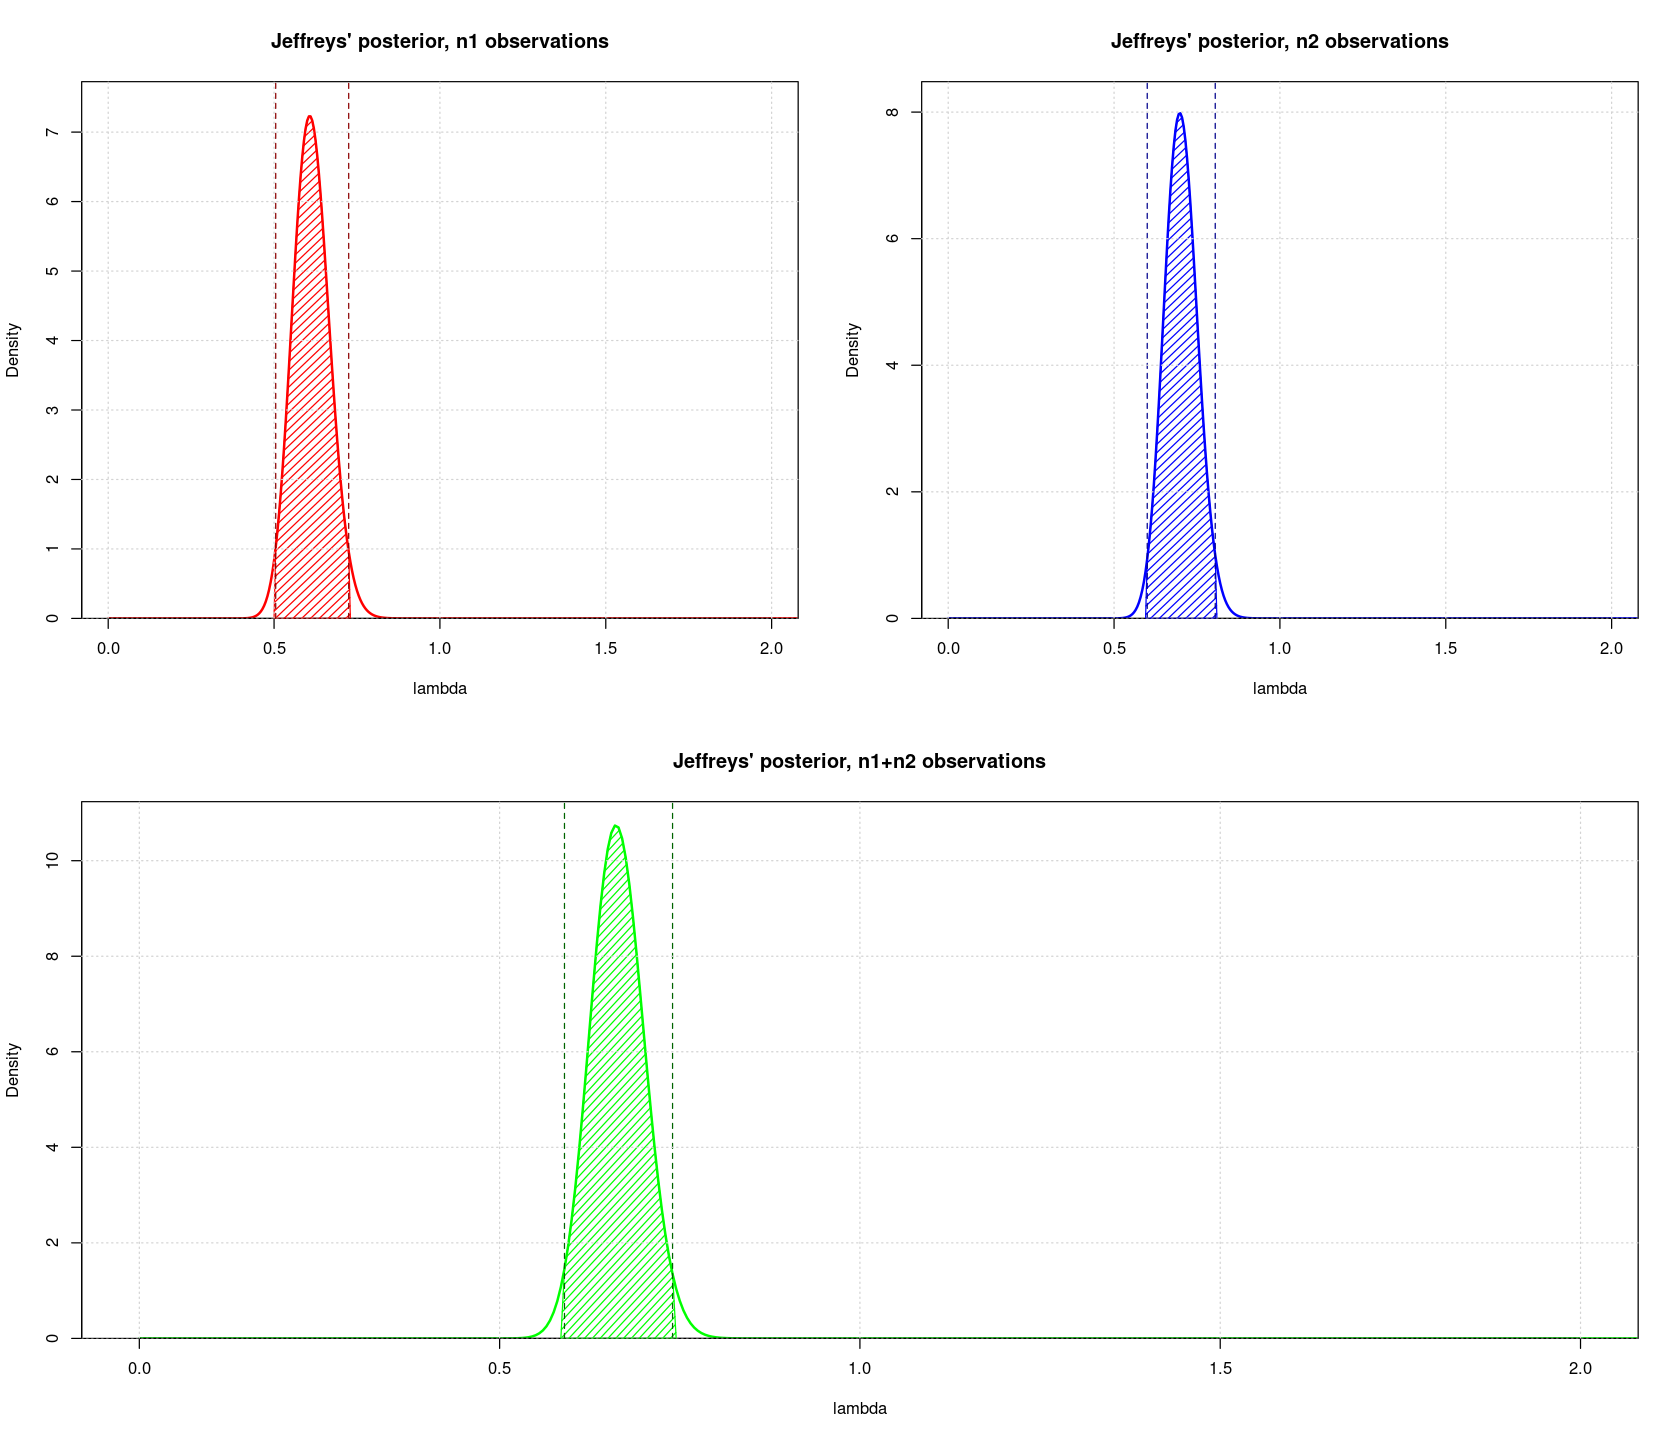

In [7]:
alpha1  <- sum(y*n1)+1/2
lambda1 <- sum(n1)
alpha2  <- sum(y*n2)+1/2
lambda2 <- sum(n2)
alpha   <- sum(y*(n1+n2))+1/2
lambda  <- sum(n1+n2)

dl <- 1/200
l  <- seq(0,max(y),dl)
j  <- length(l)

jeff.post1 <- dgamma(l, alpha1, lambda1)
jeff.post1 <- jeff.post1 / (dl*sum(jeff.post1[1:j-1]+jeff.post1[2:j])/2) 
jeff.post2 <- dgamma(l, alpha2, lambda2)
jeff.post2 <- jeff.post2 / (dl*sum(jeff.post2[1:j-1]+jeff.post2[2:j])/2) 
jeff.post  <- dgamma(l, alpha, lambda)
jeff.post  <- jeff.post / (dl*sum(jeff.post[1:j-1]+jeff.post[2:j])/2) 

jeff.i1  <- credibility(jeff.post1*dl,0.95)
jeff.i2  <- credibility(jeff.post2*dl,0.95)
jeff.i   <- credibility(jeff.post*dl,0.95)

cat('\t\tMean\t\tMedian\t\tVariance')
cat('\nn1\t\t',alpha1/lambda1,'\t\t',qgamma(0.5,alpha1,lambda1),'\t',alpha1/(lambda1^2),
    '\t',l[unif.i1[1]],'\t\t',l[unif.i1[2]],sep='')
cat('\nn2\t\t', alpha2/lambda2,'\t',qgamma(0.5,alpha2,lambda2),'\t',alpha2/(lambda2^2),
    '\t',l[unif.i2[1]],'\t\t',l[unif.i2[2]],sep='')
cat('\nn1+n2\t\t', alpha/lambda,'\t',qgamma(0.5,alpha,lambda),'\t',alpha/(lambda^2),
    '\t',l[unif.i[1]],'\t\t',l[unif.i[2]],sep='')

options(repr.plot.width=14, repr.plot.height=12)
m <- rbind(c(1,2), c(3,3))
layout(m)

plot(l,jeff.post1,type='l',lwd=2,col='red',main='Jeffreys\' posterior, n1 observations',
     xlab='lambda',ylab='Density', yaxs='i', ylim=c(0,max(jeff.post1)+0.5), xlim=c(0,2))
polygon(x = l[(jeff.i1[1]-1):(jeff.i1[2]+1)], y = c(0,jeff.post1[jeff.i1[1]:jeff.i1[2]],0), 
        col='red', density=50 )
abline(v=l[jeff.i1[1]], lty=2, col='darkred')
abline(v=l[jeff.i1[2]], lty=2, col='darkred')
grid()
plot(l,jeff.post2,type='l',lwd=2,col='blue',main='Jeffreys\' posterior, n2 observations',
     xlab='lambda',ylab='Density', yaxs='i', ylim=c(0,max(jeff.post2)+0.5), xlim=c(0,2))
polygon(x = l[(jeff.i2[1]-1):(jeff.i2[2]+1)], y = c(0,jeff.post2[jeff.i2[1]:jeff.i2[2]],0), 
        col='blue', density=50 )
abline(v=l[jeff.i2[1]], lty=2, col='darkblue')
abline(v=l[jeff.i2[2]], lty=2, col='darkblue')
grid()
plot(l,jeff.post,type='l',lwd=2,col='green',main='Jeffreys\' posterior, n1+n2 observations',
     xlab='lambda',ylab='Density', yaxs='i', ylim=c(0,max(jeff.post)+0.5), xlim=c(0,2))
polygon(x = l[(jeff.i[1]-1):(jeff.i[2]+1)], y = c(0,jeff.post[jeff.i[1]:jeff.i[2]],0), 
        col='green', density=50 )
abline(v=l[jeff.i[1]], lty=2, col='darkgreen')
abline(v=l[jeff.i[2]], lty=2, col='darkgreen')
grid()

### Exercise 3
***

A high level of bacter X was defined as a level greater tha 100 per 100 ml of stream water. $n=116$ samples taken, out of this $y=11$ had a high bacter level.

In [8]:
n <- 116
y <- 11

#### 3.a)
***
The frequentist estimator is:
$$
p_f = \frac{y}{n}
$$

In [9]:
p_f <- y/n
var_f <- p_f*(1-p_f)/n
cat('Expected value of the frequentist estimator:\t',p_f)
cat('\nVariance of the frequentist estimator:\t\t',var_f)

Expected value of the frequentist estimator:	 0.09482759
Variance of the frequentist estimator:		 0.0007399596

#### 3.b
***
For the Bayesian computation we assume as prior **Beta**$(1,10)$.

The posterior distribution will be **Beta**$(1 + y,10 +n-y)$

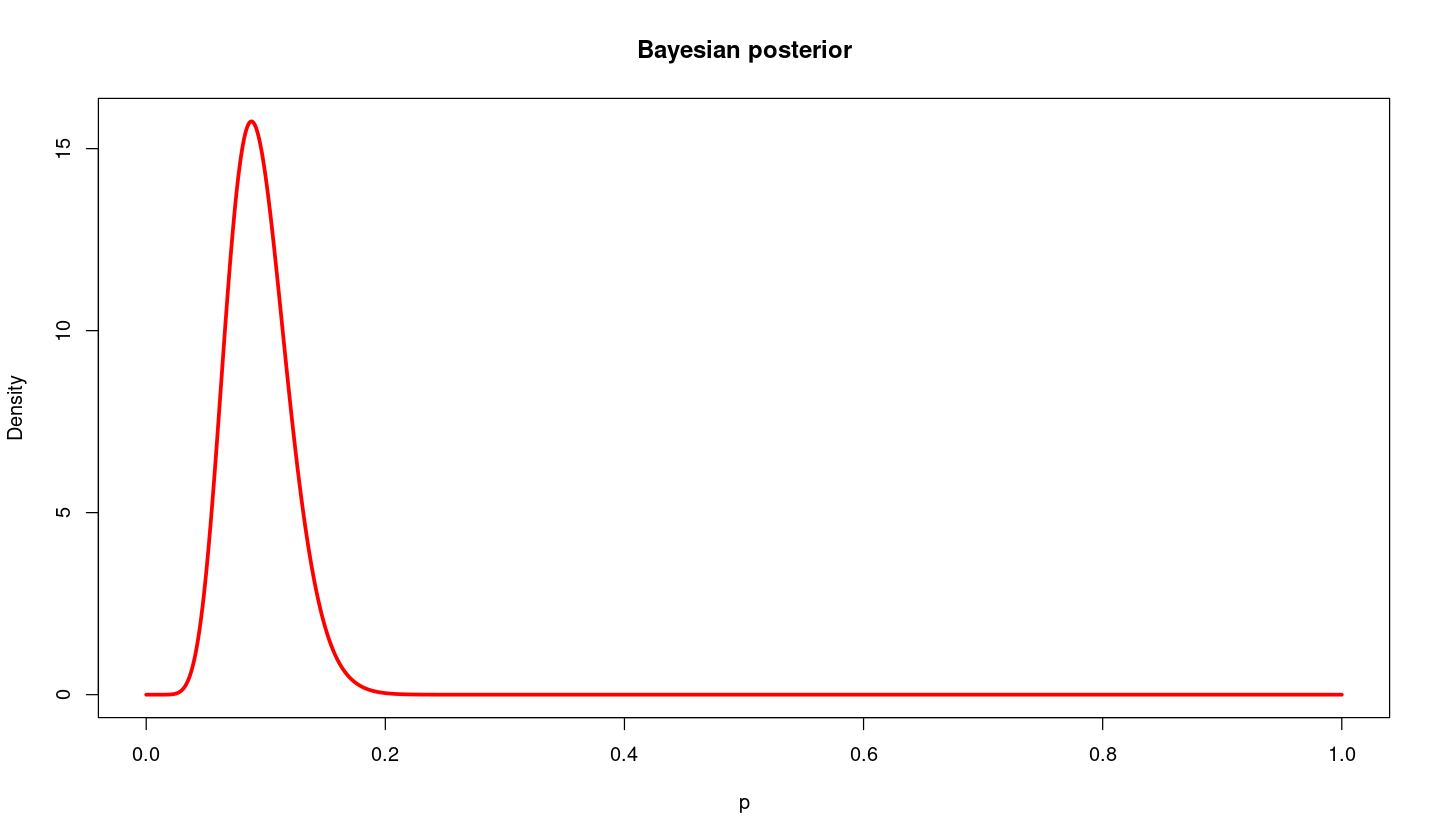

In [10]:
dp  <- 1/1000
p   <- seq(from=0, to=1, by=dp)
j   <- length(p)
a   <- 1 + y
b   <- 10 + n - y

beta.post <- dbeta(p, a, b)
beta.post <- beta.post / (dp*sum(beta.post[1:j-1]+beta.post[2:j])/2)
old.post  <- beta.post

options(repr.plot.width=12, repr.plot.height=7)
plot(p, beta.post, main='Bayesian posterior', ylab='Density', xlab='p',
     type='l', lty=1, lwd=3, col='red')

#### 3.c)
***


			Mean		Variance	Credib_left	Credib_right
Bayesian estimator	0.09448819	0.0006684388	0.049		0.151

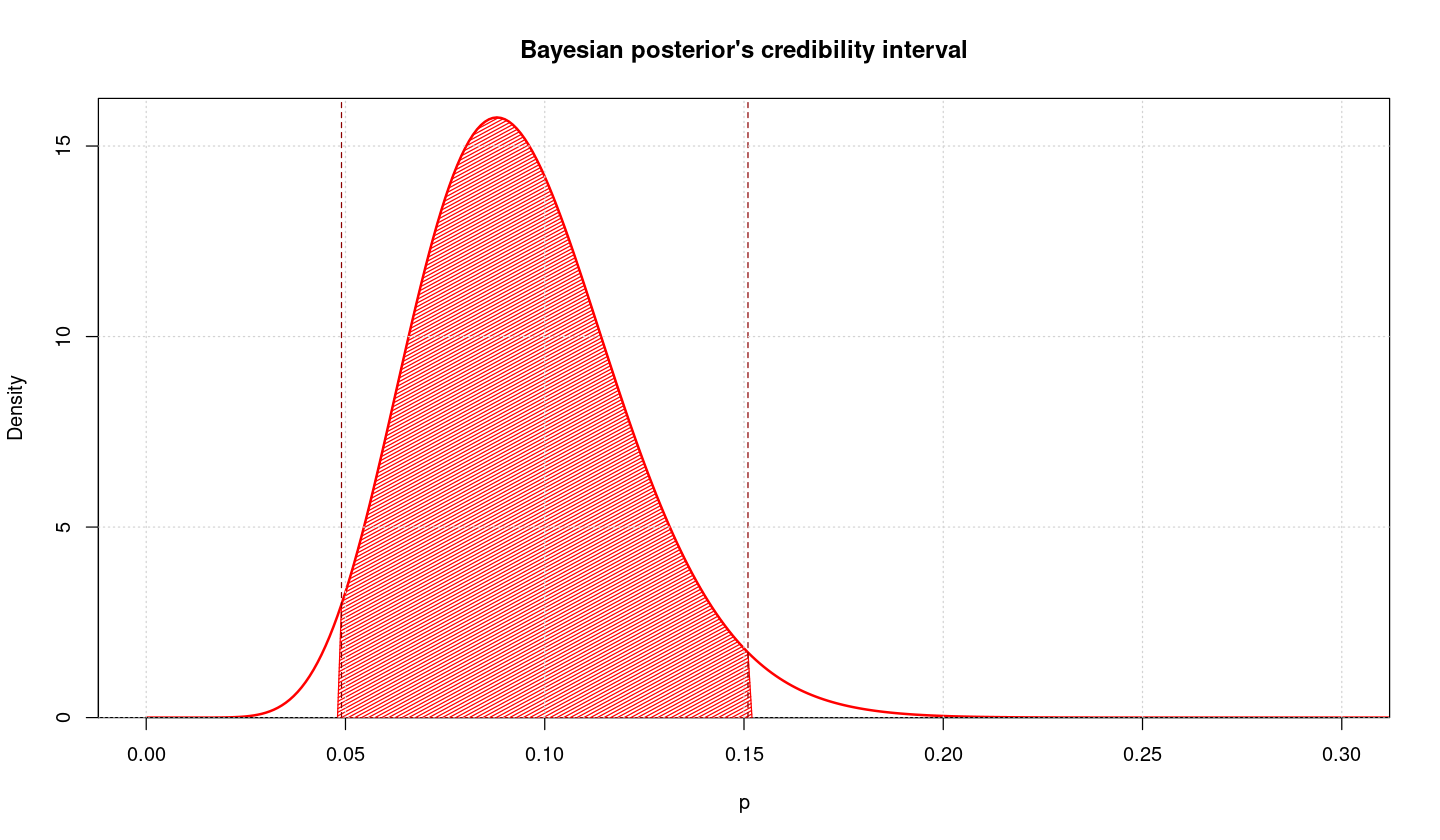

In [11]:
ix  <- credibility(beta.post*dp,0.95)

cat('\t\t\tMean\t\tVariance\tCredib_left\tCredib_right')
cat('\nBayesian estimator\t',a/(a+b),'\t',a*b/((a+b)^2 * (a+b+1)),'\t',p[ix[1]],'\t\t',p[ix[2]],sep='')

plot(p,beta.post,type='l',lwd=2,col='red',main='Bayesian posterior\'s credibility interval',
     xlab='p',ylab='Density', yaxs='i', ylim=c(0,max(beta.post)+0.5), xlim=c(0,0.3))
polygon(x = p[(ix[1]-1):(ix[2]+1)], y = c(0,beta.post[ix[1]:ix[2]],0), 
        col='red', density=50 )
abline(v=p[ix[1]], lty=2, col='darkred')
abline(v=p[ix[2]], lty=2, col='darkred')
grid()

#### 3.d)
***
The null hypotesis is $H_0 : p = 0.1$

For a $5\%$ level of significance $p=0.1$ lies inside the $95\%$ credibility interval as shown above.
For the Bayesian the null hypotesis can not be rejected.

For the frequentist approach:

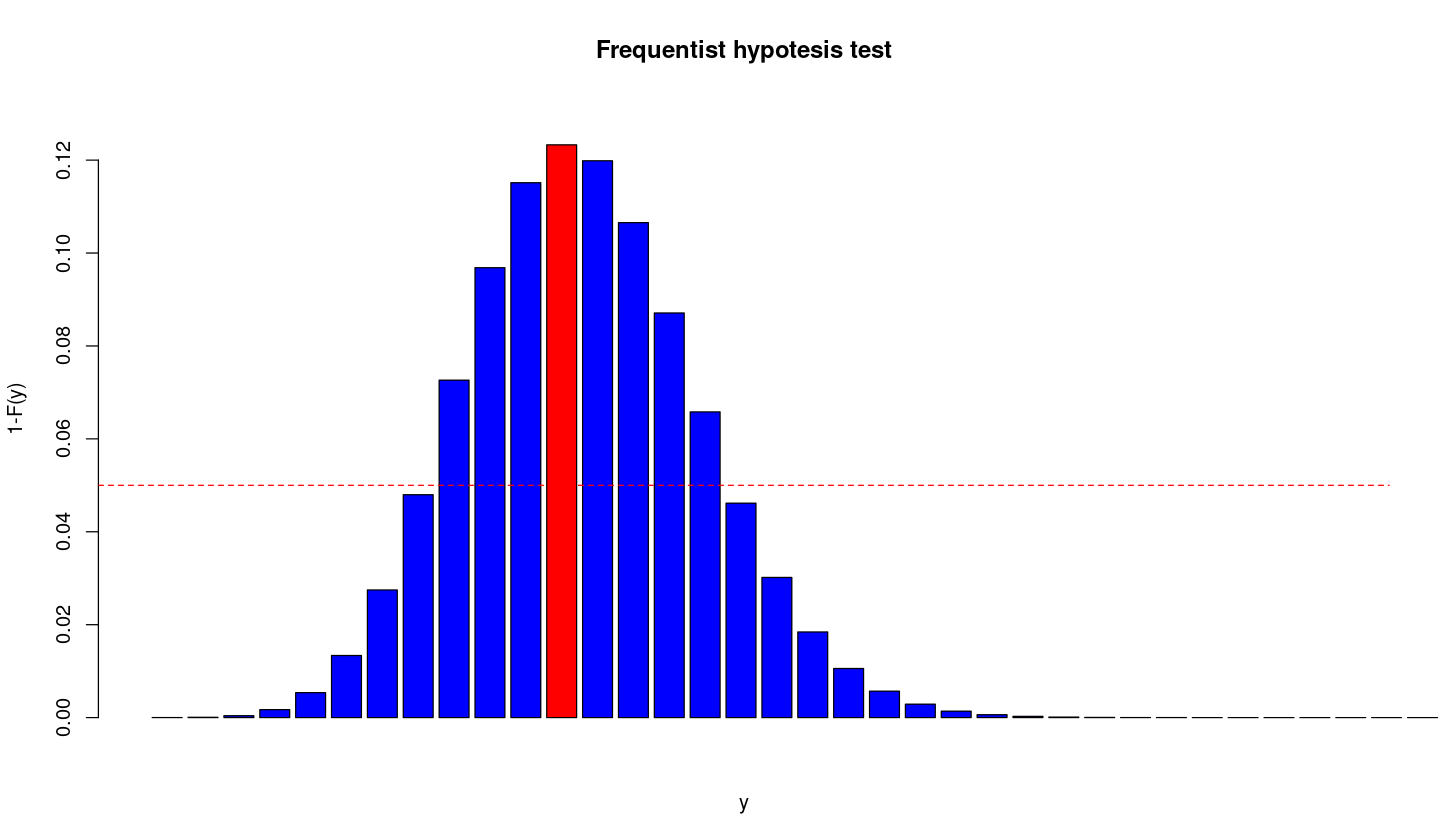

In [12]:
x <- 0:n

dist <- dbinom(x=x, size=n, p=0.1)

barplot(dist, main='Frequentist hypotesis test', ylab='1-F(y)', xlab='y',
        col=ifelse(x==y,'red','blue'),ylim=c(0,max(dist)+0.01), yaxs='i', xlim=c(0,40))
abline(h=0.05, lty=2, col='red')

Also for the frequentist the null hypothesis cannot be rejected.

#### 3.e
***
The frequentist estimator is:
$$
p_f = \frac{y}{n}
$$

In [13]:
n <- 165
y <- 9

p_f   <- y/n
var_f <- p_f*(1-p_f)/n
cat('Expected value of the frequentist estimator:\t',p_f)
cat('\nVariance of the frequentist estimator:\t\t',var_f)

Expected value of the frequentist estimator:	 0.05454545
Variance of the frequentist estimator:		 0.000312547

#### 3.f
***
For the Bayesian computation we assume as prior both **Beta**$(1,10)$ and the previous posterior distribution.

The posterior distribution will be respectively **Beta**$(1 + y,10 +n-y)$ and **Beta**$(\alpha' + y,\beta' +n-y)$

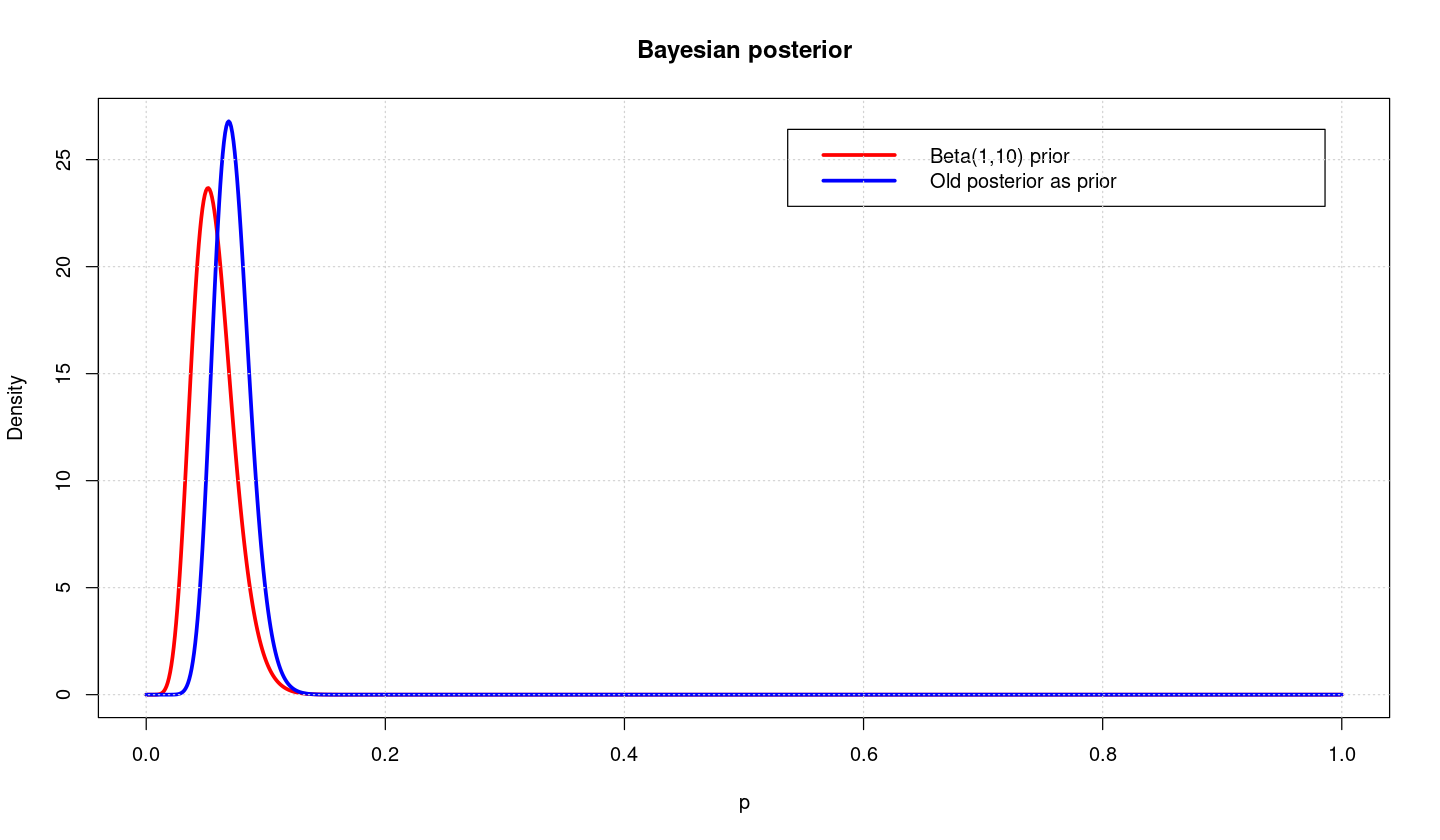

In [14]:
dp  <- 1/1000
p   <- seq(from=0, to=1, by=dp)
j   <- length(p)
a1  <- 1 + y
b1  <- 10 + n - y
a2  <- a + y
b2  <- b + n - y

beta.post1 <- dbeta(p, a1, b1)
beta.post1 <- beta.post1 / (dp*sum(beta.post1[1:j-1]+beta.post1[2:j])/2)
beta.post2 <- dbeta(p, a2, b2)
beta.post2 <- beta.post2 / (dp*sum(beta.post2[1:j-1]+beta.post2[2:j])/2)

options(repr.plot.width=12, repr.plot.height=7)
plot(p, beta.post1, main='Bayesian posterior', ylab='Density', xlab='p',
     type='l', lty=1, lwd=3, col='red', ylim=c(0,max(beta.post2)))
lines(p, beta.post2, type='l', lty=1, lwd=3, col='blue')
legend('topright', legend=c('Beta(1,10) prior','Old posterior as prior'), 
       lty=1, lwd=3, col=c('red','blue'), inset=0.05)
grid()

#### 3.g)
***

			Mean		Variance	Credib_left	Credib_right
Beta (1,10)		0.05681818	0.0003027677	0.027		0.095
Old posterior		0.07191781	0.0002278008	0.044		0.104

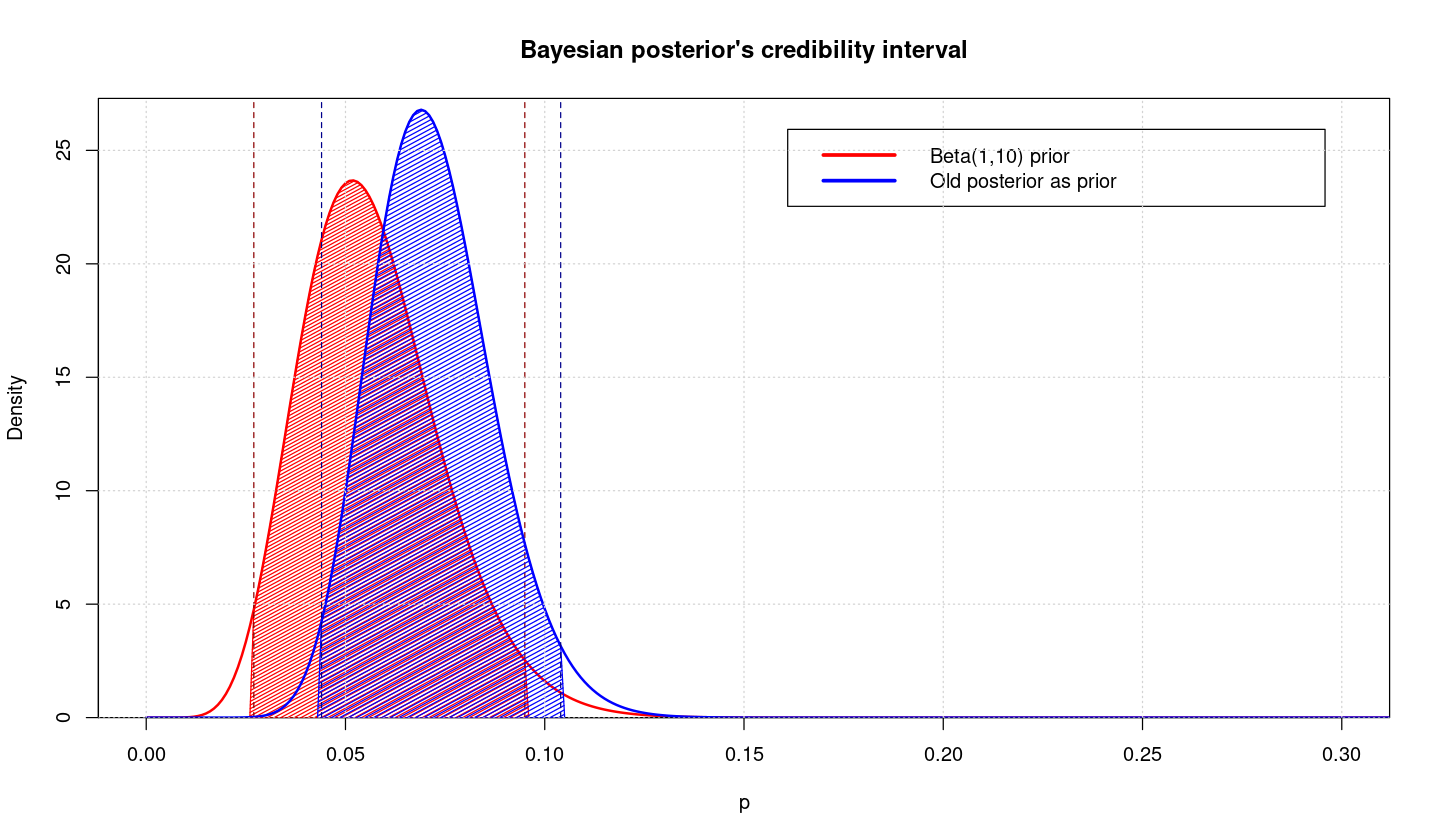

In [15]:
ix1  <- credibility(beta.post1*dp,0.95)
ix2  <- credibility(beta.post2*dp,0.95)

cat('\t\t\tMean\t\tVariance\tCredib_left\tCredib_right')
cat('\nBeta (1,10)\t\t',a1/(a1+b1),'\t',a1*b1/((a1+b1)^2 * (a1+b1+1)),'\t',p[ix1[1]],'\t\t',p[ix1[2]],sep='')
cat('\nOld posterior\t\t',a2/(a2+b2),'\t',a2*b2/((a2+b2)^2 * (a2+b2+1)),'\t',p[ix2[1]],'\t\t',p[ix2[2]],sep='')

plot(p,beta.post1,type='l',lwd=2,col='red',main='Bayesian posterior\'s credibility interval',
     xlab='p',ylab='Density', yaxs='i', ylim=c(0,max(beta.post2)+0.5), xlim=c(0,0.3))
polygon(x = p[(ix1[1]-1):(ix1[2]+1)], y = c(0,beta.post1[ix1[1]:ix1[2]],0), 
        col='red', density=50 )
abline(v=p[ix1[1]], lty=2, col='darkred')
abline(v=p[ix1[2]], lty=2, col='darkred')
lines(p,beta.post2,type='l',lwd=2,col='blue')
polygon(x = p[(ix2[1]-1):(ix2[2]+1)], y = c(0,beta.post2[ix2[1]:ix2[2]],0), 
        col='blue', density=40 )
abline(v=p[ix2[1]], lty=2, col='darkblue')
abline(v=p[ix2[2]], lty=2, col='darkblue')
legend('topright', legend=c('Beta(1,10) prior','Old posterior as prior'), 
       lty=1, lwd=3, col=c('red','blue'), inset=0.05)
grid()

#### 3.d)
***
The null hypotesis is $H_0 : p = 0.1$

As we can see above, for a $5\%$ level of significance $p=0.1$ lies inside the $95\%$ credibility interval just for the posterior geneted assuming as prior the old posterior.
For the Bayesian the null hypotesis:
* it's rejeced if the posterior is calculated using **Beta**$(1,10)$ as prior:
* cannot be rejected if the posterior is calculated using the old posterior.

For the frequentist approach:

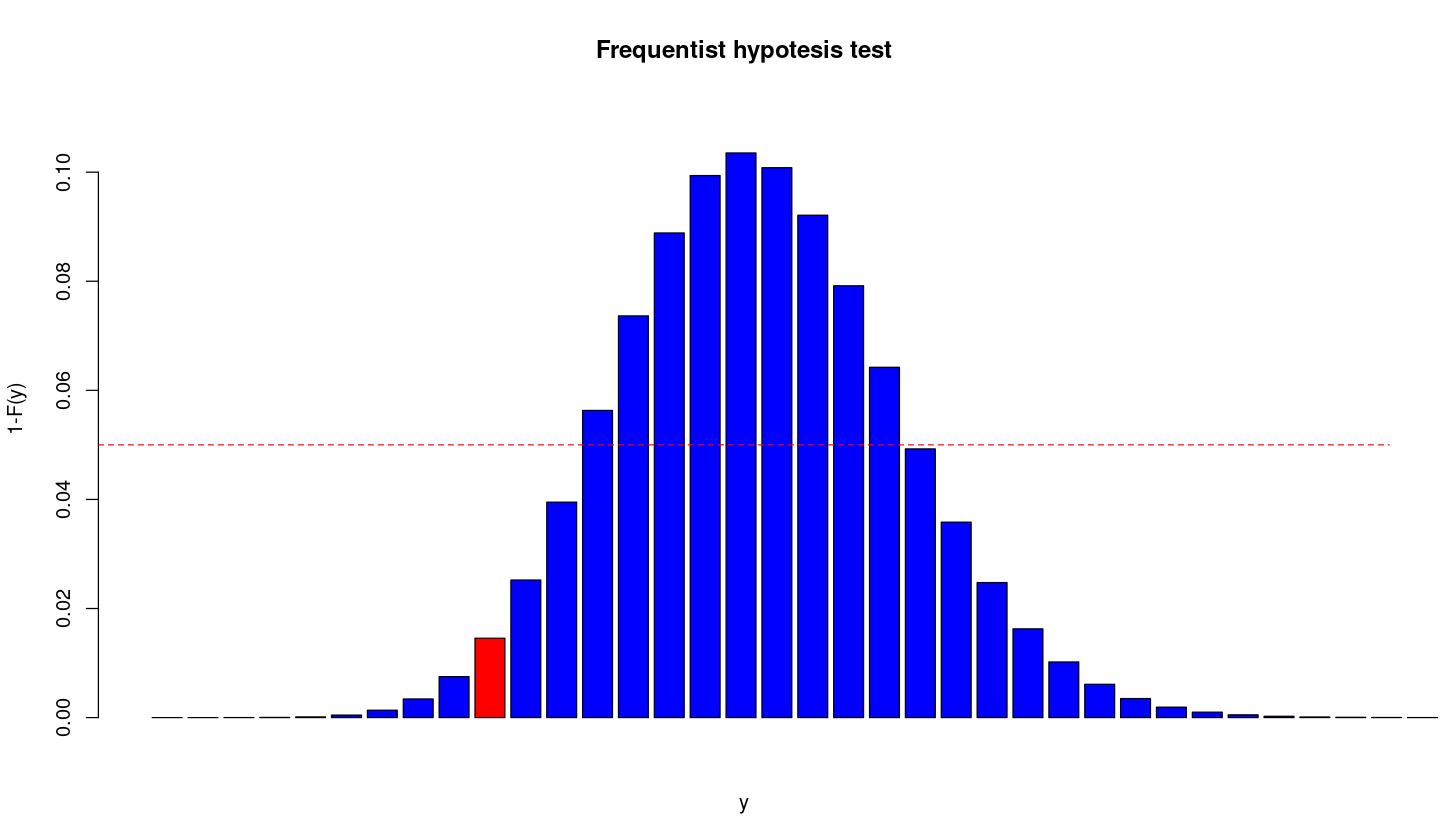

In [16]:
x <- 0:n

dist <- dbinom(x=x, size=n, p=0.1)

barplot(dist, main='Frequentist hypotesis test', ylab='1-F(y)', xlab='y',
        col=ifelse(x==y,'red','blue'),ylim=c(0,max(dist)+0.01), yaxs='i', xlim=c(0,40))
abline(h=0.05, lty=2, col='red')

For the frequentist the null hypothesis it is rejected.